In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
df_train = pd.read_csv('Training Data.csv')
df_test = pd.read_csv('Test Data.csv')

In [36]:
df_train.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [39]:
df_train = df_train.drop(['current_job_years','Id'],axis=1)

subgrade_dummies = pd.get_dummies(df_train['city'],drop_first=True)
df_train = pd.concat([df_train.drop('city',axis=1),subgrade_dummies],axis=1)

subgrade_dummies = pd.get_dummies(df_train['married'],drop_first=True)
df_train = pd.concat([df_train.drop('married',axis=1),subgrade_dummies],axis=1)

subgrade_dummies = pd.get_dummies(df_train['house_ownership'],drop_first=True)
df_train = pd.concat([df_train.drop('house_ownership',axis=1),subgrade_dummies],axis=1)

subgrade_dummies = pd.get_dummies(df_train['car_ownership'],drop_first=True)
df_train = pd.concat([df_train.drop('car_ownership',axis=1),subgrade_dummies],axis=1)

subgrade_dummies = pd.get_dummies(df_train['profession'],drop_first=True)
df_train = pd.concat([df_train.drop('profession',axis=1),subgrade_dummies],axis=1)

subgrade_dummies = pd.get_dummies(df_train['current_house_years'],drop_first=True)
df_train = pd.concat([df_train.drop('current_house_years',axis=1),subgrade_dummies],axis=1)

subgrade_dummies = pd.get_dummies(df_train['state'],drop_first=True)
df_train = pd.concat([df_train.drop('state',axis=1),subgrade_dummies],axis=1)

from sklearn.preprocessing import MinMaxScaler

dfr = df_train['income']
dfr = np.array(dfr)
dfr = dfr.reshape(-1,1)
scaler = MinMaxScaler()
dfr = scaler.fit_transform(dfr)
df_train['income'] = dfr

dfr = df_train['age']
dfr = np.array(dfr)
dfr = dfr.reshape(-1,1)
scaler = MinMaxScaler()
dfr = scaler.fit_transform(dfr)
df_train['age'] = dfr

dfr = df_train['experience']
dfr = np.array(dfr)
dfr = dfr.reshape(-1,1)
scaler = MinMaxScaler()
dfr = scaler.fit_transform(dfr)
df_train['experience'] = dfr

In [40]:
df_train.head()

,income,age,experience,risk_flag,Agartala,Agra,Ahmedabad,Ahmednagar,Aizawl,Ajmer,Akola,Alappuzha,Aligarh,Allahabad,Alwar,Amaravati,Ambala,Ambarnath,Ambattur,Amravati,Amritsar,Amroha,Anand,Anantapur,Anantapuram[24],Arrah,Asansol,Aurangabad,Aurangabad[39],Avadi,Bahraich,Ballia,Bally,Bangalore,Baranagar,Barasat,Bardhaman,Bareilly,Bathinda,Begusarai,...,Software_Developer,Statistician,Surgeon,Surveyor,Technical_writer,Technician,Technology_specialist,Web_designer,11,12,13,14,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Gujarat,Haryana,Himachal_Pradesh,Jammu_and_Kashmir,Jharkhand,Karnataka,Kerala,Madhya_Pradesh,Maharashtra,Manipur,Mizoram,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil_Nadu,Telangana,Tripura,Uttar_Pradesh,Uttar_Pradesh[5],Uttarakhand,West_Bengal
0,0.129487,0.034483,0.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.757206,0.327586,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.398564,0.775862,0.20,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.625263,0.344828,0.10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.576454,0.448276,0.55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [41]:
df_test = df_test.drop(['current_job_years','id'],axis=1)

subgrade_dummies = pd.get_dummies(df_test['city'],drop_first=True)
df_test = pd.concat([df_test.drop('city',axis=1),subgrade_dummies],axis=1)

subgrade_dummies = pd.get_dummies(df_test['married'],drop_first=True)
df_test = pd.concat([df_test.drop('married',axis=1),subgrade_dummies],axis=1)

subgrade_dummies = pd.get_dummies(df_test['house_ownership'],drop_first=True)
df_test = pd.concat([df_test.drop('house_ownership',axis=1),subgrade_dummies],axis=1)

subgrade_dummies = pd.get_dummies(df_test['car_ownership'],drop_first=True)
df_test = pd.concat([df_test.drop('car_ownership',axis=1),subgrade_dummies],axis=1)

subgrade_dummies = pd.get_dummies(df_test['profession'],drop_first=True)
df_test = pd.concat([df_test.drop('profession',axis=1),subgrade_dummies],axis=1)

subgrade_dummies = pd.get_dummies(df_test['current_house_years'],drop_first=True)
df_test = pd.concat([df_test.drop('current_house_years',axis=1),subgrade_dummies],axis=1)

subgrade_dummies = pd.get_dummies(df_test['state'],drop_first=True)
df_test = pd.concat([df_test.drop('state',axis=1),subgrade_dummies],axis=1)

from sklearn.preprocessing import MinMaxScaler

dfr = df_test['income']
dfr = np.array(dfr)
dfr = dfr.reshape(-1,1)
scaler = MinMaxScaler()
dfr = scaler.fit_transform(dfr)
df_test['income'] = dfr

dfr = df_test['age']
dfr = np.array(dfr)
dfr = dfr.reshape(-1,1)
scaler = MinMaxScaler()
dfr = scaler.fit_transform(dfr)
df_test['age'] = dfr

dfr = df_test['experience']
dfr = np.array(dfr)
dfr = dfr.reshape(-1,1)
scaler = MinMaxScaler()
dfr = scaler.fit_transform(dfr)
df_test['experience'] = dfr

In [42]:
df_test.head()

,income,age,experience,Agartala,Agra,Ahmedabad,Ahmednagar,Aizawl,Ajmer,Akola,Alappuzha,Aligarh,Allahabad,Alwar,Amaravati,Ambala,Ambarnath,Ambattur,Amravati,Amritsar,Amroha,Anand,Anantapur,Anantapuram[24],Arrah,Asansol,Aurangabad,Aurangabad[39],Avadi,Bahraich,Ballia,Bally,Bangalore,Baranagar,Barasat,Bardhaman,Bareilly,Bathinda,Begusarai,Belgaum,...,Software Developer,Statistician,Surgeon,Surveyor,Technical writer,Technician,Technology specialist,Web designer,11,12,13,14,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Mizoram,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttar Pradesh[5],Uttarakhand,West Bengal
0,0.739054,0.655172,0.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.120596,0.068966,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.890037,0.500000,0.60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.193614,0.482759,0.45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.000312,0.068966,0.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
X = df_train.drop('risk_flag',axis=1)
y = df_train['risk_flag']

In [44]:
from sklearn.model_selection import train_test_split

X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size=0.3,random_state=101)

In [47]:
X_train.shape

(176400, 405)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
earlystop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [48]:
model = Sequential()

model.add(Dense(405,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(25,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(12,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3,activation='relu'))
model.add(Dropout(0.25))


model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_cv,y_cv),callbacks=[earlystop],verbose=1)

Epoch 1/600
5513/5513 [==============================] - 40s 7ms/step - loss: 0.4193 - accuracy: 0.8703 - val_loss: 0.3445 - val_accuracy: 0.8769
Epoch 2/600
5513/5513 [==============================] - 36s 7ms/step - loss: 0.3444 - accuracy: 0.8778 - val_loss: 0.3010 - val_accuracy: 0.8769
Epoch 3/600
5513/5513 [==============================] - 36s 7ms/step - loss: 0.3100 - accuracy: 0.8776 - val_loss: 0.2817 - val_accuracy: 0.8769
Epoch 4/600
5513/5513 [==============================] - 36s 7ms/step - loss: 0.2912 - accuracy: 0.8771 - val_loss: 0.2756 - val_accuracy: 0.8769
Epoch 5/600
5513/5513 [==============================] - 36s 7ms/step - loss: 0.2772 - accuracy: 0.8767 - val_loss: 0.2702 - val_accuracy: 0.8769
Epoch 6/600
5513/5513 [==============================] - 36s 7ms/step - loss: 0.2677 - accuracy: 0.8768 - val_loss: 0.2686 - val_accuracy: 0.8769
Epoch 7/600
5513/5513 [==============================] - 36s 7ms/step - loss: 0.2577 - accuracy: 0.8779 - val_loss: 0.2631 -

In [50]:
df_loss = pd.DataFrame(model.history.history)

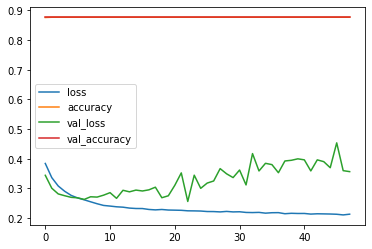

In [51]:
df_loss.plot()

In [52]:
val_loss,val_acc = model.evaluate(X_cv,y_cv)
print(val_loss)
print(val_acc)

2363/2363 [==============================] - 5s 2ms/step - loss: 0.3568 - accuracy: 0.8769
0.3568364977836609
0.8768783211708069


In [ ]:
pred = np.argmax(model.predict(X_cv),-1)

In [72]:
THRESHOLD = 0.05
pred = np.where(model.predict_proba(X_cv) > THRESHOLD, 1, 0)

from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,classification_report

print(roc_auc_score(y_cv,pred))
print()
print(accuracy_score(y_cv,pred))
print()
print(confusion_matrix(y_cv,pred))
print()
print(classification_report(y_cv,pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


0.8653856947207897

0.8440079365079365

[[55488 10804]
 [  989  8319]]

              precision    recall  f1-score   support

           0       0.98      0.84      0.90     66292
           1       0.44      0.89      0.59      9308

    accuracy                           0.84     75600
   macro avg       0.71      0.87      0.74     75600
weighted avg       0.92      0.84      0.86     75600



In [73]:
THRESHOLD = 0.05
pred = np.where(model.predict_proba(df_test) > THRESHOLD, 1, 0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [74]:
pred = pd.DataFrame(pred)
index = pd.DataFrame(range(1,28001))
index = pd.concat([index,pred],axis=1)
index.columns = ['id','risk_flag']
index.set_index('id',inplace=True)
index.to_csv('result_8.csv')

In [75]:
index

,risk_flag
id,
1,0
2,0
3,0
4,0
5,0
...,...
27996,0
27997,0
27998,0
